### Importing Library and Datasets

In [1]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [2]:
appledf = pd.read_csv("AppleStore.csv")    #use your own path for the data set
appledf.head(10)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1
5,6,283619399,Shanghai Mahjong,10485713,USD,0.99,8253,5516,4.0,4.0,1.8,4+,Games,47,5,1,1
6,7,283646709,PayPal - Send and request money safely,227795968,USD,0.00,119487,879,4.0,4.5,6.12.0,4+,Finance,37,0,19,1
7,8,284035177,Pandora - Music & Radio,130242560,USD,0.00,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1
8,9,284666222,PCalc - The Best Calculator,49250304,USD,9.99,1117,4,4.5,5.0,3.6.6,4+,Utilities,37,5,1,1
9,10,284736660,Ms. PAC-MAN,70023168,USD,3.99,7885,40,4.0,4.0,4.0.4,4+,Games,38,0,10,1


In [3]:
appledf = appledf[["track_name","price", "rating_count_tot","user_rating", "cont_rating","prime_genre"]]
appledf.head(10)

,track_name,price,rating_count_tot,user_rating,cont_rating,prime_genre
0,PAC-MAN Premium,3.99,21292,4.0,4+,Games
1,Evernote - stay organized,0.00,161065,4.0,4+,Productivity
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",0.00,188583,3.5,4+,Weather
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",0.00,262241,4.0,12+,Shopping
4,Bible,0.00,985920,4.5,4+,Reference
5,Shanghai Mahjong,0.99,8253,4.0,4+,Games
6,PayPal - Send and request money safely,0.00,119487,4.0,4+,Finance
7,Pandora - Music & Radio,0.00,1126879,4.0,12+,Music
8,PCalc - The Best Calculator,9.99,1117,4.5,4+,Utilities
9,Ms. PAC-MAN,3.99,7885,4.0,4+,Games


In [4]:
googledf = pd.read_csv("googleplaystore.csv")    #use your own path for the data set
googledf.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [5]:
googledf = googledf[["App", "Price", "Reviews","Rating","Content Rating", "Category"]]
googledf.head(10)

,App,Price,Reviews,Rating,Content Rating,Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,0,159,4.1,Everyone,ART_AND_DESIGN
1,Coloring book moana,0,967,3.9,Everyone,ART_AND_DESIGN
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0,87510,4.7,Everyone,ART_AND_DESIGN
3,Sketch - Draw & Paint,0,215644,4.5,Teen,ART_AND_DESIGN
4,Pixel Draw - Number Art Coloring Book,0,967,4.3,Everyone,ART_AND_DESIGN
5,Paper flowers instructions,0,167,4.4,Everyone,ART_AND_DESIGN
6,Smoke Effect Photo Maker - Smoke Editor,0,178,3.8,Everyone,ART_AND_DESIGN
7,Infinite Painter,0,36815,4.1,Everyone,ART_AND_DESIGN
8,Garden Coloring Book,0,13791,4.4,Everyone,ART_AND_DESIGN
9,Kids Paint Free - Drawing Fun,0,121,4.7,Everyone,ART_AND_DESIGN


In [6]:
googledf = googledf.drop_duplicates(subset="App")
appledf = appledf.drop_duplicates(subset="track_name")

In [7]:
googledf.dropna(inplace=True)
googledf[googledf.isnull().any(axis=1)]

,App,Price,Reviews,Rating,Content Rating,Category


In [8]:
#finding Null values
appledf[appledf.isnull().any(axis=1)]

,track_name,price,rating_count_tot,user_rating,cont_rating,prime_genre


In [9]:
#saving processed dataframe
googledf.to_csv("processed_google.csv")
appledf.to_csv("processed_apple.csv")

In [10]:
appledata = pd.read_csv("processed_apple.csv")
googledata = pd.read_csv("processed_google.csv")

In [11]:
googledata = googledata.replace("ART_AND_DESIGN", "Education")
googledata = googledata.replace("AUTO_AND_VEHICLES", "Catalogs")
googledata = googledata.replace("BEAUTY", "Lifestyle")
googledata = googledata.replace("BOOKS_AND_REFERENCE", "Book")
googledata = googledata.replace("BUSINESS", "Business")
googledata = googledata.replace("COMICS", "Book")
googledata = googledata.replace("COMMUNICATION", "Productivity")
googledata = googledata.replace("DATING", "Lifestyle")
googledata = googledata.replace("EDUCATION", "Education")
googledata = googledata.replace("ENTERTAINMENT", "Entertainment")
googledata = googledata.replace("EVENTS", "Lifestyle")
googledata = googledata.replace("FAMILY", "Games")
googledata = googledata.replace("FINANCE", "Finance")
googledata = googledata.replace("FOOD_AND_DRINK", "Food & Drink")
googledata = googledata.replace("GAME", "Games")
googledata = googledata.replace("HEALTH_AND_FITNESS", "Health & Fitness")
googledata = googledata.replace("HOUSE_AND_HOME", "Shopping")
googledata = googledata.replace("LIBRARIES_AND_DEMO", "Music")
googledata = googledata.replace("LIFESTYLE", "Lifestyle")
googledata = googledata.replace("MAPS_AND_NAVIGATION", "Navigation")
googledata = googledata.replace("MEDICAL", "Medical")
googledata = googledata.replace("NEWS_AND_MAGAZINES", "News")
googledata = googledata.replace("PARENTING", "Medical")
googledata = googledata.replace("PERSONALIZATION", "Lifestyle")
googledata = googledata.replace("PHOTOGRAPHY", "Photo & Video")
googledata = googledata.replace("PRODUCTIVITY", "Productivity")
googledata = googledata.replace("SHOPPING", "Shopping")
googledata = googledata.replace("SOCIAL", "Social Networking")
googledata = googledata.replace("SPORTS", "Sports")
googledata = googledata.replace("TOOLS", "Utilities")
googledata = googledata.replace("TRAVEL_AND_LOCAL", "Travel")
googledata = googledata.replace("VIDEO_PLAYERS", "Photo & Video")
googledata = googledata.replace("WEATHER", "Weather")

googledata = googledata.replace("Adults only 18+", "17")
googledata = googledata.replace("Everyone", "4")
googledata = googledata.replace("Everyone 10+", "9")
googledata = googledata.replace("Mature 17+", "17")
googledata = googledata.replace("Teen", "12")
googledata = googledata.replace("Unrated", "NaN")

googledata = googledata.drop(columns=['Unnamed: 0'])


googledata.head(10)

,App,Price,Reviews,Rating,Content Rating,Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,0,159,4.1,4,Education
1,Coloring book moana,0,967,3.9,4,Education
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0,87510,4.7,4,Education
3,Sketch - Draw & Paint,0,215644,4.5,12,Education
4,Pixel Draw - Number Art Coloring Book,0,967,4.3,4,Education
5,Paper flowers instructions,0,167,4.4,4,Education
6,Smoke Effect Photo Maker - Smoke Editor,0,178,3.8,4,Education
7,Infinite Painter,0,36815,4.1,4,Education
8,Garden Coloring Book,0,13791,4.4,4,Education
9,Kids Paint Free - Drawing Fun,0,121,4.7,4,Education


In [12]:
appledata['cont_rating'] = appledata['cont_rating'].astype('object').str.replace('+', '')
appledata['cont_rating'] = pd.to_numeric(appledata['cont_rating'])

appledata = appledata.drop(columns=['Unnamed: 0'])

appledata.head(10)

,track_name,price,rating_count_tot,user_rating,cont_rating,prime_genre
0,PAC-MAN Premium,3.99,21292,4.0,4,Games
1,Evernote - stay organized,0.00,161065,4.0,4,Productivity
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",0.00,188583,3.5,4,Weather
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",0.00,262241,4.0,12,Shopping
4,Bible,0.00,985920,4.5,4,Reference
5,Shanghai Mahjong,0.99,8253,4.0,4,Games
6,PayPal - Send and request money safely,0.00,119487,4.0,4,Finance
7,Pandora - Music & Radio,0.00,1126879,4.0,12,Music
8,PCalc - The Best Calculator,9.99,1117,4.5,4,Utilities
9,Ms. PAC-MAN,3.99,7885,4.0,4,Games


In [13]:
appledata = appledata[appledata["user_rating"] != 0]

In [14]:
#googledata["Rating"].fillna("3.5", inplace = True)
#googledata[googledata.isnull().any(axis=1)]

In [15]:
#googledata.dropna(inplace=True)
#googledata[googledata.isnull().any(axis=1)]

In [16]:
googledata.loc[googledata["Content Rating"] == "NaN"]

,App,Price,Reviews,Rating,Content Rating,Category
6275,DC Universe Online Map,0,1186,4.1,NaN,Utilities


In [17]:
googledata = googledata[googledata["Content Rating"] != "NaN"]
googledata.loc[googledata["Content Rating"] == "NaN"]

,App,Price,Reviews,Rating,Content Rating,Category


In [18]:
googledata['Price'] = googledata['Price'].str.replace('$', '')

In [19]:
appledata.dtypes

track_name           object
price               float64
rating_count_tot      int64
user_rating         float64
cont_rating           int64
prime_genre          object
dtype: object

In [20]:
googledata.dtypes

App                object
Price              object
Reviews             int64
Rating            float64
Content Rating     object
Category           object
dtype: object

In [21]:
# convert column "a" to int64 dtype and "b" to complex type
googledata = googledata.astype({"Price": 'float64', "Reviews": 'int64', "Rating": 'float64', "Content Rating": 'int64'})
googledata.dtypes

App                object
Price             float64
Reviews             int64
Rating            float64
Content Rating      int64
Category           object
dtype: object

In [22]:
googledata.describe()

,Price,Reviews,Rating,Content Rating
count,8195.000000,8.195000e+03,8195.000000,8195.000000
mean,1.038011,2.552825e+05,4.173252,5.647468
std,16.858906,1.985713e+06,0.536657,3.572714
min,0.000000,1.000000e+00,1.000000,4.000000
25%,0.000000,1.260000e+02,4.000000,4.000000
50%,0.000000,3.005000e+03,4.300000,4.000000
75%,0.000000,4.382600e+04,4.500000,4.000000
max,400.000000,7.815831e+07,5.000000,17.000000


In [23]:
appledata.describe()

,price,rating_count_tot,user_rating,cont_rating
count,6266.000000,6.266000e+03,6266.000000,6266.000000
mean,1.822558,1.480850e+04,4.049793,6.903766
std,6.129129,8.099718e+04,0.727025,4.153883
min,0.000000,1.000000e+00,1.000000,4.000000
25%,0.000000,7.800000e+01,4.000000,4.000000
50%,0.000000,5.130000e+02,4.500000,4.000000
75%,2.990000,3.964500e+03,4.500000,9.000000
max,299.990000,2.974676e+06,5.000000,17.000000


In [24]:
appledata["App"] = appledata["track_name"].astype('str')
googledata["App"] = googledata["App"].astype('str')

commonapps = []

commonapps = sorted(pd.merge(appledata, googledata, on=['App'], how='inner')["track_name"].unique())

appledata = appledata.drop(['App'],axis=1)
print(commonapps)

['ADP Mobile Solutions', 'AJ Jump: Animal Jam Kangaroos!', 'AMC', 'ASOS', 'Adobe Illustrator Draw', 'Afterlight', 'Agar.io', 'AirWatch Agent', 'Airbnb', 'Alizay, pirate girl', 'Allrecipes Dinner Spinner', "Alto's Adventure", 'Amazon Prime Video', 'Amex Mobile', 'AnatomyMapp', 'Angry Birds 2', 'Angry Birds Blast', 'Angry Birds Epic RPG', 'Angry Birds Friends', 'Angry Birds Go!', 'Angry Birds Rio', 'Angry Birds Space HD', 'Angry Birds Star Wars', 'Animal Jam - Play Wild!', 'Ao Oni2', 'Army of Heroes', 'Asphalt 8: Airborne', "Assassin's Creed Identity", 'BET NOW - Watch Shows', 'Bad Piggies', 'Bad Piggies HD', "Baldur's Gate: Enhanced Edition", 'Battlefield™ Companion', 'Battleheart Legacy', 'Bejeweled Blitz', 'Bejeweled Classic', 'Best Buy', 'Bible', 'Bike Unchained', 'Bloons TD 5', 'Boom Beach', 'Boomerang from Instagram', 'Bullet Force', 'Call of Duty®: Heroes', 'Can Knockdown 3', 'Candy Crush Jelly Saga', 'Candy Crush Saga', 'Candy Crush Soda Saga', 'Cartoon Wars 3', 'Chase Mobile', '

In [25]:
appledata["prime_genre"] = appledata["prime_genre"].astype('category')
appledata["prime_genre"] = appledata["prime_genre"].cat.codes

googledata["Category"] = googledata["Category"].astype('category')
googledata["Category"] = googledata["Category"].cat.codes

### Regression Analysis

In [26]:
#Train the model
X_train = appledata.drop(columns=['track_name','price'])
y_train = appledata.price
X_test = googledata.drop(columns=['App','Price'])
y_test = googledata.Price

In [27]:
#fit the model for price
modelprice = linear_model.LinearRegression()

modelprice.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
#Making predictions for Price
#PricePredict_test = modelprice.predict(X_test)
PricePredict_test = np.clip(modelprice.predict(X_test), googledata['Price'].min(), googledata['Price'].max())
print("Predictions for Price test in Google Store : ", PricePredict_test)

Predictions for Price test in Google Store :  [2.10158171 2.06492946 1.92093832 ... 2.15990293 1.84659891 0.73783805]


In [29]:
count = 0
predictedpricetot = 0
actualpricetot = 0
commondf = pd.DataFrame(columns = ['Apps','Predicted', 'Actual'])
for apps in commonapps:
    for predictedprice in PricePredict_test[googledata.loc[googledata['App'] == apps].index]:
        predictedpricetot = predictedpricetot  + predictedprice
    
    for actualprice in googledata.loc[googledata['App'] == apps].Price.values:
        actualpricetot = actualpricetot + actualprice
        
    commondf = commondf.append({'Apps': apps, 'Predicted': round(predictedprice,2), 'Actual': round(actualprice,2)}, ignore_index=True)    
        
    count = count + 1
    
avgpredictedprice = 0 
avgactualpricetot = 0
avgpredictedprice = round(predictedpricetot / count, 2)
avgactualpricetot = round(actualpricetot / count, 2)

In [30]:
print("The average predicted price is for Google store :", avgpredictedprice)

The average predicted price is for Google store : 0.92


In [31]:
print("The average actual price is for Google store :" , avgactualpricetot)

The average actual price is for Google store : 0.73


In [32]:
percent = round(((avgpredictedprice - avgactualpricetot)/avgactualpricetot)*100, 2)
print("The Apple store is ", percent, "% expensive than Google store")

The Apple store is  26.03 % expensive than Google store


In [36]:
columns = ["sugar, sugar", "Where's My Water?", "Instagram","WhatsApp Messenger", "WeChat","Tsuro - The Game of the Path","True Skate","Fruit Ninja Classic","Timehop","deep.io", "Endless Ducker"]
commondf = commondf.loc[commondf['Apps'].isin(columns)]

In [37]:
commondf.head(10)

,Apps,Predicted,Actual
87,Endless Ducker,1.81,0.00
109,Fruit Ninja Classic,1.40,0.99
146,Instagram,0.00,0.00
273,Timehop,1.00,0.00
287,True Skate,1.38,1.99
288,Tsuro - The Game of the Path,2.10,2.99
307,WeChat,0.00,0.00
310,WhatsApp Messenger,0.00,0.00
311,Where's My Water?,1.95,1.99
327,"sugar, sugar",1.71,1.20


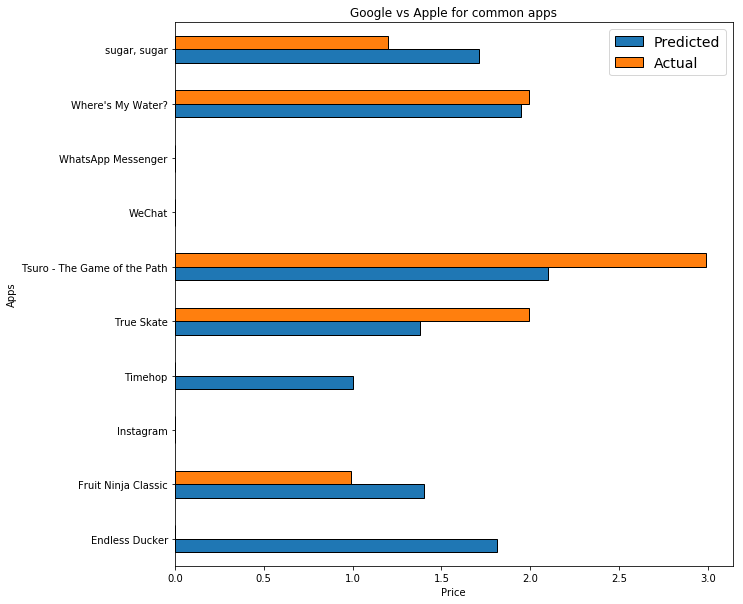

In [39]:
commondf.groupby("Apps").agg({"Predicted":"sum","Actual":"sum"}).plot(kind="barh",
                                                            figsize = (10,10),
                                                            edgecolor = "k",
                                                            linewidth =1 )
plt.title("Google vs Apple for common apps")
plt.legend(loc = "best" , prop = {"size" : 14})
plt.xlabel("Price")
plt.show()